In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
stress_df = pd.read_csv('Stress-Lysis.csv')

In [12]:
stress_df.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


# body humidity and body temp

In [13]:
stress_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [14]:
stress_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Humidity,2001.0,20.000000,5.777833,10.0,15.0,20.0,25.0,30.0
Temperature,2001.0,89.000000,5.777833,79.0,84.0,89.0,94.0,99.0
Step count,2001.0,100.141429,58.182948,0.0,50.0,101.0,150.0,200.0
Stress Level,2001.0,1.104448,0.771094,0.0,0.0,1.0,2.0,2.0


In [15]:
# no missing and duplicate values
from ydata_profiling import ProfileReport
report = ProfileReport(stress_df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='Stress Level', ylabel='count'>

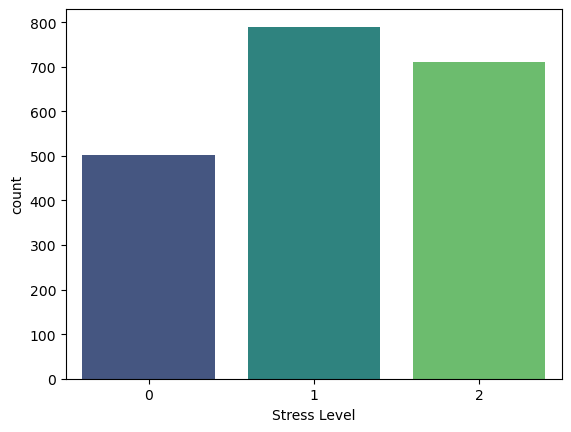

In [16]:
# 0 -low stress 1-moderate stress 2-high stress
%matplotlib inline
sns.countplot(x='Stress Level',data=stress_df,palette='viridis')

<Axes: >

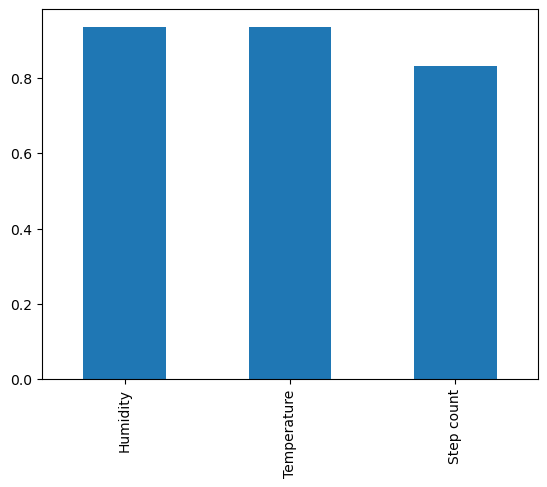

In [19]:
# all having high correlation
stress_df.corr()['Stress Level'].drop('Stress Level').plot(kind='bar')

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


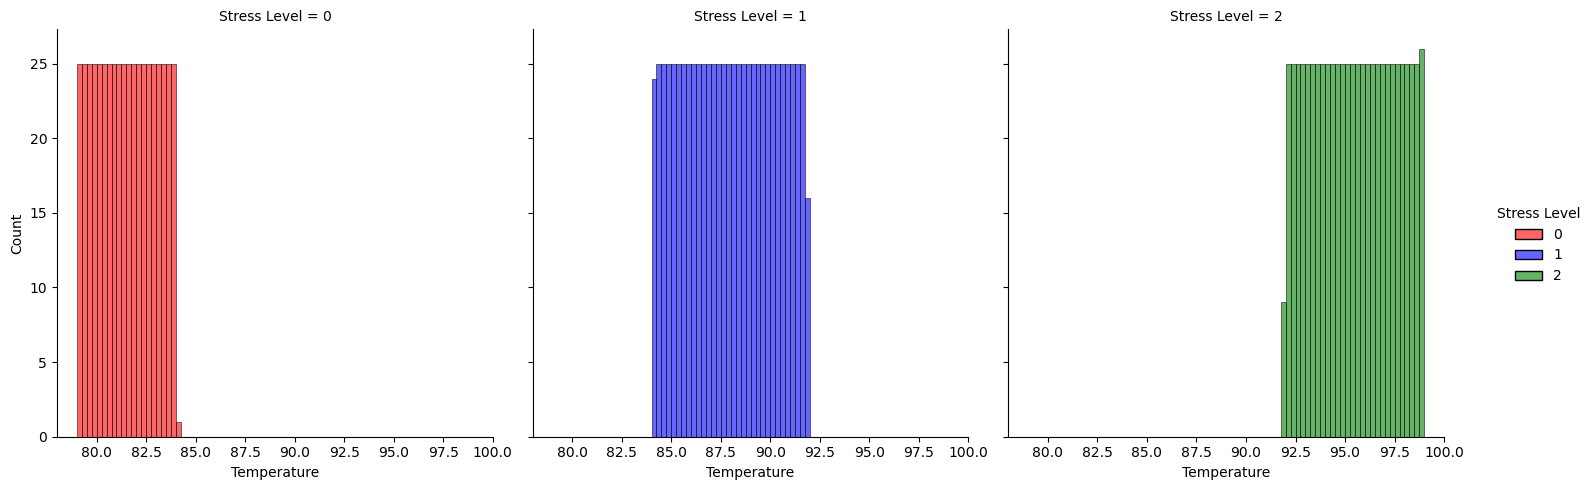

In [29]:
facet_kws = {'hue':"Stress Level","palette":{0:'red',1:"blue",2:"green"}}
sns.displot(x='Temperature',data=stress_df,col='Stress Level',**facet_kws,alpha=0.6,bins=80)
#lower temperature correlates with lower stress level

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


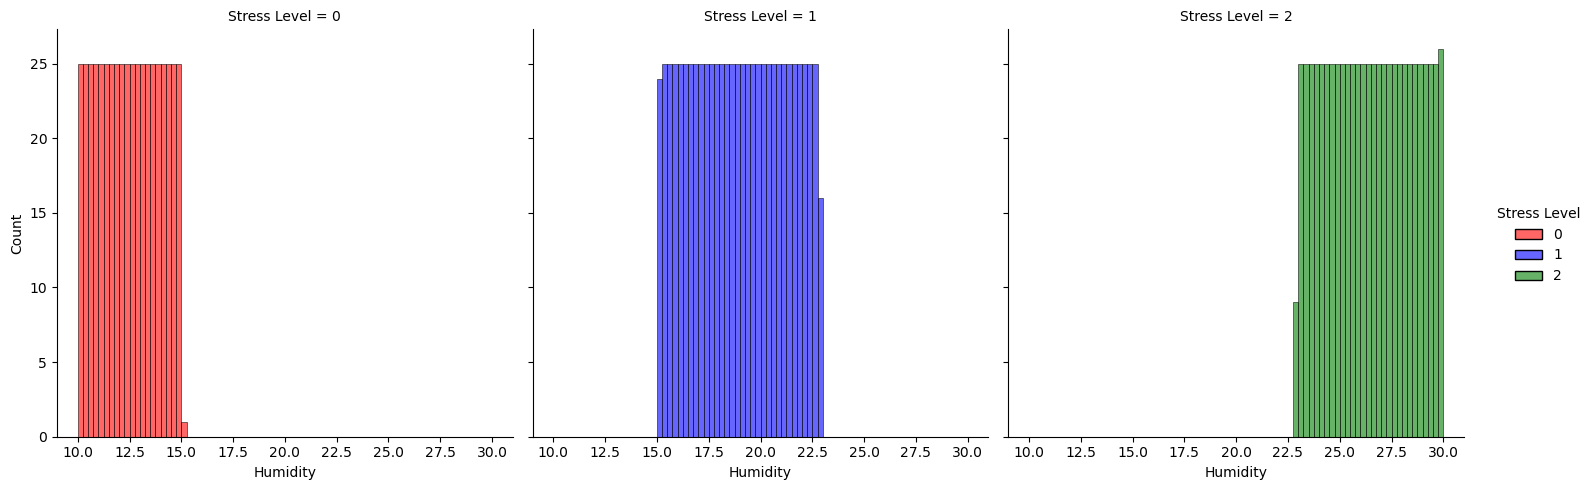

In [31]:
facet_kws = {'hue':"Stress Level","palette":{0:'red',1:"blue",2:"green"}}
sns.displot(x='Humidity',data=stress_df,col='Stress Level',**facet_kws,alpha=0.6,bins=80)

/Users/aadityajoshi/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


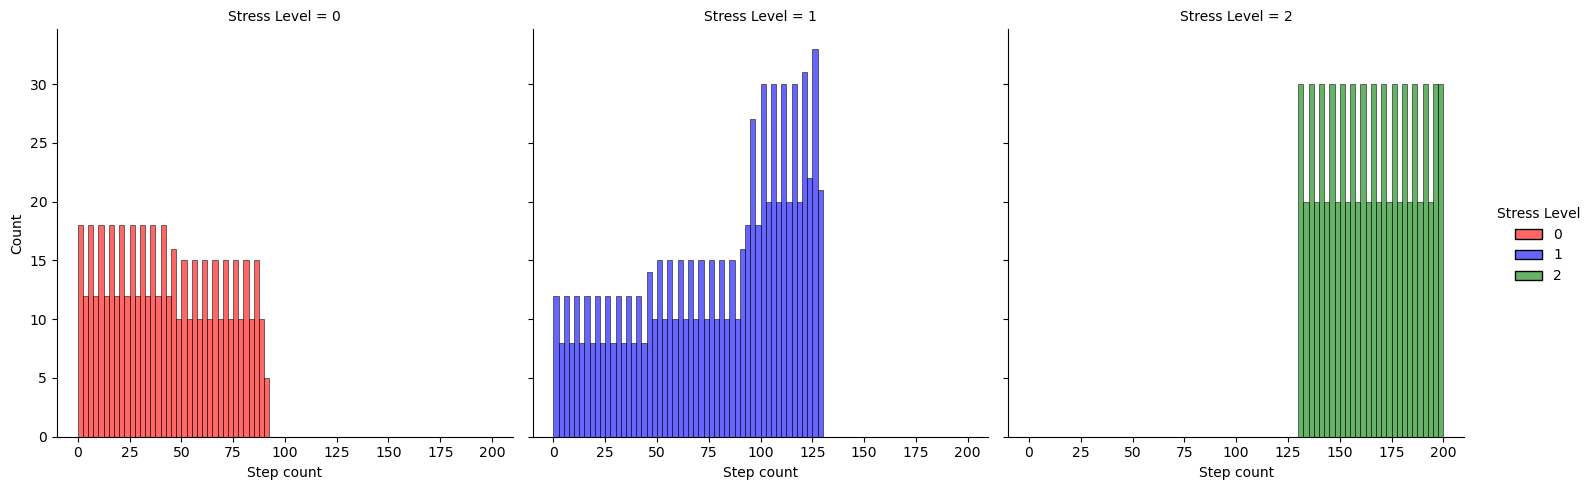

In [33]:
#higher stress leading to higher stress 
facet_kws = {'hue':"Stress Level","palette":{0:'red',1:"blue",2:"green"}}
sns.displot(x='Step count',data=stress_df,col='Stress Level',**facet_kws,alpha=0.6,bins=80)

In [36]:
from sklearn.model_selection import train_test_split
X = stress_df.drop('Stress Level',axis=1)
y = stress_df['Stress Level']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler
stcrl = StandardScaler()
X_train = stcrl.fit_transform(X_train)
X_test = stcrl.transform(X_test)


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred_dtree = dtree.predict(X_test)

In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print("DTREE")
print(classification_report(y_test,pred_dtree))
print(confusion_matrix(y_test,pred_dtree))

DTREE
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501

[[128   0   0]
 [  0 190   0]
 [  0   0 183]]


In [42]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)
pred_svm = svm.predict(X_test)
print(classification_report(y_test,pred_svm))
print(confusion_matrix(y_test,pred_svm))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       128
           1       0.99      1.00      1.00       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501

[[127   1   0]
 [  0 190   0]
 [  0   0 183]]


In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_test,y_test)
pred_rfc = rfc.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00       190
           2       1.00      1.00      1.00       183

    accuracy                           1.00       501
   macro avg       1.00      1.00      1.00       501
weighted avg       1.00      1.00      1.00       501

[[128   0   0]
 [  0 190   0]
 [  0   0 183]]
